# Iris Classification

Lets try to build a classifier to detect the Iris_Virginica type

In [3]:
# Importing Dataset 

from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [6]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Must be the petal width 

In [8]:
print(iris['target'])
print(iris['target_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


0 = setosa 
1 = versicolor 
2 = virginica 

In [10]:
import numpy as np 

X = iris['data'][:, 3:] #get petal width 
y = (iris['target'] == 2).astype(np.int) # list consisting of 1s and 0s where 1 = Iris-Virginica and 0 is other types

/var/folders/23/9yyjjc7d5qzgg1rk2yt_yhwc0000gn/T/ipykernel_27543/2635050088.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target'] == 2).astype(np.int) # list consisting of 1s and 0s where 1 = Iris-Virginica and 0 is other types


Lets train a logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Lets look at the model's estimated probabilties for flowers with petal widths varying from 0 to 3 cm

Text(0.5, 0, 'Petal Width (cm)')

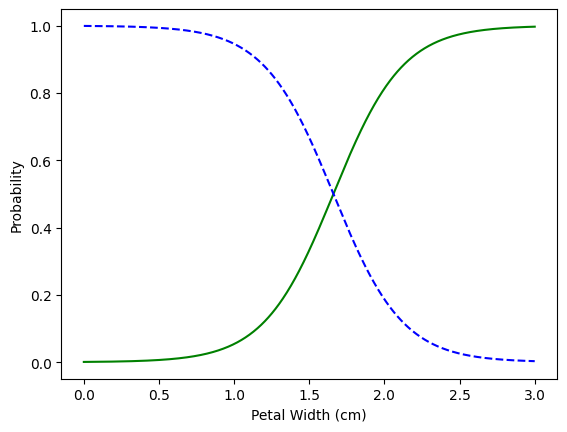

In [21]:
import matplotlib.pyplot as plt 


X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginica")
plt.ylabel("Probability")
plt.xlabel("Petal Width (cm)")

Lets use a softmax regression

In [22]:
X = iris["data"][:, (2,3)] # petal length and petal width 
y = iris["target"]

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

Lets see what the model thinks an iris is with a 5 cm long and 2 cm wide petals

In [25]:
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


The model thinks the iris is a Iris-Virginia with a probability of 94% 
It also thinks it could be a Iris-Versicolor with a probability of 5.8% 